<a href="https://colab.research.google.com/github/hossein20s/Average_Blood_Pressure_estimation/blob/master/wrist_ppg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')
!ln -s "/gdrive/My Drive/data" "/content/data"

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
ln: failed to create symbolic link '/content/data/data': Function not implemented




*   List item
*   List item



In [0]:

!pip install wfdb

data  g  s1_high_resistance_bike.dat  sample_data
     |████████████████████████████████| 102kB 6.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/bb/a9/00/0078d26b0c15b31be0001af8eb659496709c361c69641303f1
Successfully built wfdb


DB list [['adfecgdb', 'Abdominal and Direct Fetal ECG Database'], ['aftdb', 'AF Termination Challenge Database'], ['ahadb', 'AHA Database [sample excluded record]'], ['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'], ['apnea-ecg', 'Apnea-ECG Database'], ['chfdb', 'BIDMC Congestive Heart Failure Database'], ['bidmc', 'BIDMC PPG and Respiration Dataset'], ['bpssrat', 'Blood Pressure in Salt-Sensitive Dahl Rats'], ['capslpdb', 'CAP Sleep Database'], ['crisdb', 'CAST RR Interval Sub-Study Database'], ['cves', 'Cerebral Vasoregulation in Elderly with Stroke'], ['challenge/2009/test-set-a', 'Challenge 2009 Test Set A'], ['challenge/2009/test-set-b', 'Challenge 2009 Test Set B'], ['challenge/2010/set-a', 'Challenge 2010 Training Set A'], ['challenge/2010/set-b', 'Challenge 2010 Test Set B'], ['challenge/2010/set-c', 'Challenge 2010 Test Set C'], ['challenge/2011/sim', 'Challenge 2011 Pilot Set'], ['challenge/2011/set-a', 'Challenge 2011 Training Set A'], ['challenge/2011/set-b', 'Challenge 2011 

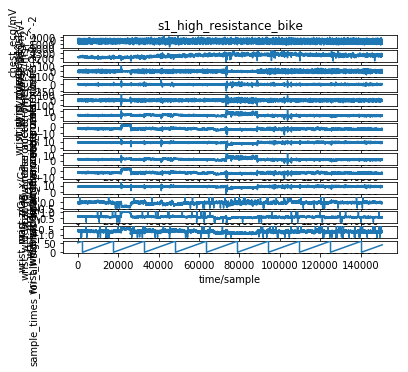

header dictionary {'record_name': 's1_high_resistance_bike', 'n_sig': 15, 'fs': 256, 'counter_freq': None, 'base_counter': None, 'sig_len': 150785, 'base_time': None, 'base_date': None, 'comments': ['High resistance biking_level 6'], 'sig_name': ['chest_ecg', 'wrist_ppg', 'wrist_gyro_x', 'wrist_gyro_y', 'wrist_gyro_z', 'wrist_low_noise_accelerometer_x', 'wrist_low_noise_accelerometer_y', 'wrist_low_noise_accelerometer_z', 'wrist_wide_range_accelerometer_x', 'wrist_wide_range_accelerometer_y', 'wrist_wide_range_accelerometer_z', 'wrist_mag_x', 'wrist_mag_y', 'wrist_mag_z', 'sample_times_for_all_signals_apart_from_ecg'], 'p_signal': None, 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['s1_high_resistance_bike.dat', 's1_high_resistance_bike.dat', 's1_high_resistance_bike.dat', 's1_high_resistance_bike.dat', 's1_high_resistance_bike.dat', 's1_high_resistance_bike.dat', 's1_high_resistance_bike.dat', 's1_high_resistance_bike.dat', 's1_high_resistance_bike.dat', 's1_

In [0]:
import wfdb

db = wfdb.get_dbs()
print('DB list', db)
db_name = 'wrist'
record_name = 's1_high_resistance_bike'
list = wfdb.get_record_list('wrist')
print('Record list', list)
record = wfdb.rdrecord(record_name, pb_dir=db_name)
header = wfdb.rdheader(record_name, pb_dir=db_name)
wfdb.plot_wfdb(record=record, title=record.record_name)
print('header dictionary', header.__dict__)



In [0]:
signals, fields = wfdb.rdsamp(record_name, channels=[1], sampfrom=100, sampto=15000, pb_dir=db_name)
print('Sample signals', signals)
print('Sample fields', fields)
ppg = signals[:,0]
ppg

Sample signals [[1214.65530425]
 [1215.37455824]
 [1216.22825223]
 ...
 [1212.07405627]
 [1211.77492728]
 [1211.57998928]]
Sample fields {'fs': 256, 'sig_len': 14900, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['wrist_ppg'], 'comments': ['High resistance biking_level 6']}


array([1214.65530425, 1215.37455824, 1216.22825223, ..., 1212.07405627,
       1211.77492728, 1211.57998928])

In [41]:
import pandas as pd

df = pd.DataFrame()
df['ppg'] = ppg

!wget bit.ly/facets_display_ipynb -O facets_display.ipynb
%run facets_display.ipynb

facets_display(df)

--2019-06-12 20:43:37--  http://bit.ly/facets_display_ipynb
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gist.githubusercontent.com/hossein20s/0b9a6d250da3ede146846027328b12f7/raw/8401a8c4183f54e76cae5e03e539ebd77af11d1e/facets_display.ipynb [following]
--2019-06-12 20:43:37--  https://gist.githubusercontent.com/hossein20s/0b9a6d250da3ede146846027328b12f7/raw/8401a8c4183f54e76cae5e03e539ebd77af11d1e/facets_display.ipynb
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2532 (2.5K) [text/plain]
Saving to: ‘facets_display.ipynb’

facets_display.ipyn 100%[===================>]   2.47K  --.-KB/s    in 0s      

2